# Song Recommender

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('spotify_database_2.0.csv')
df_dtypes = pd.DataFrame(df.select_dtypes(include=['float64', 'int']))
df_dtypes.head(5)
df.shape

#creating a dataframe with the numerical features

(5295, 17)

In [3]:
# Normalization
scaler = StandardScaler()
scaler.fit(df_dtypes)
global X_scaled
X_scaled = scaler.transform(df_dtypes)
global X_scaled_df 
X_scaled_df = pd.DataFrame(X_scaled, columns = df_dtypes.columns)
#display(df.head())
#print()
display(X_scaled_df.head()) # normalized dataframe


,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness
0,-0.718752,-0.206895,-0.345831,0.310310,-1.104172,2.379648,-0.209723,-0.503510,-0.346683,0.253971,0.663310,0.086663,-0.577251
1,0.766828,0.725971,0.479519,0.597307,-1.104172,0.119914,-0.209723,3.543568,0.477965,0.292367,0.002162,0.086663,-0.566912
2,-0.777587,-0.834785,0.204402,-1.360922,0.905656,1.073472,-0.209662,-0.552951,0.456033,-1.642748,-0.764019,0.086663,-0.065457
3,0.112290,0.098081,1.029752,-0.150249,0.905656,-0.394113,-0.209723,0.591249,0.241098,0.197130,0.022070,0.086663,-0.636185
4,0.840372,0.749891,1.304869,0.059135,-1.104172,0.641391,-0.209723,1.537686,1.061360,-0.834703,0.113925,0.086663,-0.326007


## Clustering

In [4]:
kmeans = KMeans(random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

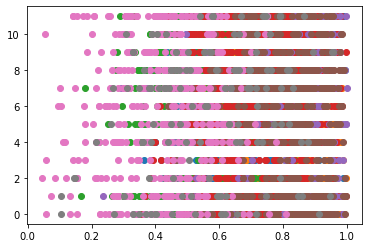

In [5]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_dtypes.to_numpy()[row_ix, 1], df_dtypes.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [6]:
#number of observations
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     965
1    1239
2     549
3    1326
4     142
5     498
6     444
7     132
dtype: int64

In [7]:
df = pd.DataFrame(df)
df["cluster"] = clusters
df.head()
df_dtypes["cluster"] = clusters
df_dtypes
#df.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness,cluster
0,0.566,0.664,4,-5.303,0,0.63400,0.000000,0.116,0.437,128.945,241688,4,0.0464,6
1,0.768,0.820,7,-4.630,0,0.17900,0.000000,0.689,0.625,129.965,213293,4,0.0474,5
2,0.558,0.559,6,-9.222,1,0.37100,0.000007,0.109,0.620,78.558,180387,4,0.0959,6
3,0.679,0.715,9,-6.383,1,0.07550,0.000000,0.271,0.571,127.435,214148,4,0.0407,1
4,0.778,0.824,10,-5.892,0,0.28400,0.000000,0.405,0.758,100.024,218093,4,0.0707,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.24300,0.000000,0.199,0.487,122.034,215960,4,0.0312,1
5291,0.439,0.610,9,-7.236,1,0.59300,0.000011,0.341,0.172,181.088,215508,4,0.1160,6
5292,0.897,0.371,1,-5.019,1,0.09040,0.000000,0.325,0.441,81.008,156005,4,0.3680,2
5293,0.964,0.398,11,-8.981,0,0.00151,0.000039,0.101,0.563,105.012,178405,4,0.0795,3


In [8]:
# retrieving a random song to test the code
df[df['cluster'] == 4].sample()

,id,title,all_artists,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness,cluster
5131,4kxOMXF9aVjztdBVM12gbn,Venus,Bananarama,2001-10-29,0.722,0.961,9,-4.812,1,0.0883,0.61,0.278,0.91,126.113,229165,4,0.0514,4


Training a K-Means model with 2 neighbours! 

Training a K-Means model with 3 neighbours! 

Training a K-Means model with 4 neighbours! 

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 

Training a K-Means model with 20 neighbours! 

Training a K-Means model with 21 neighbours! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

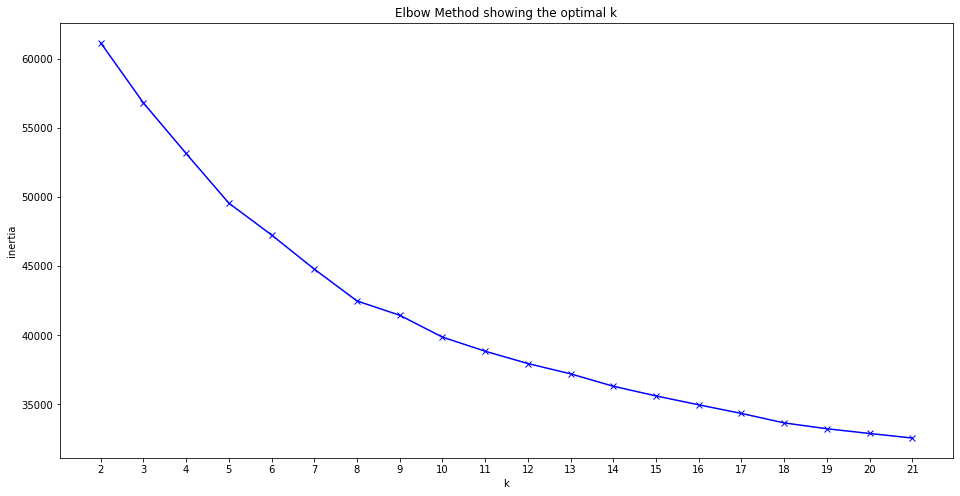

In [14]:
K = range(2,22)
inertia = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Saving with pickle

In [10]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)


def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!") 


scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

## Using function from Hot 100

In [11]:
from hot_songs_func import hot_songs
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import config
import csv
import random
import warnings
warnings.filterwarnings("ignore")
from IPython.display import IFrame
import webbrowser

In [12]:
client_credentials_manager = SpotifyClientCredentials(client_id=config.client_id, client_secret=config.client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [19]:

hot_df = pd.read_csv('billboard_hot200.csv')


inp = input('Insert the name of a song: ')  # Get the input

artist = hot_df['artist'].str.contains(inp, case=False).any()
title = hot_df['title'].str.contains(inp, case=False).any()
ran = random.randint(0, 199)


if artist or title:
    for i in hot_df.index:
        if i == ran:
            print('That`s a hot song! You should try this one:', hot_df.artist[i] + ' - ' +hot_df.title[i])
            

else:
    hot_inp = sp.search('input')
    audio_features = sp.audio_features(hot_inp["tracks"]["items"][0]["uri"])[0]
    track_features = { key: [audio_features[key]] for key in list(audio_features.keys()) }
    track_df = pd.DataFrame(track_features)

    # transforming it in a dataframe
    track_dtype = track_df.select_dtypes(include=['float64', 'int'])
    track_dtype_df = pd.DataFrame(track_dtype)
    #track_dtype_df['cluster'] = cluster

    #normalizing
    audio_scaled = scaler.transform(track_dtype_df)
    audio_scaled_df = pd.DataFrame(audio_scaled, columns = track_dtype_df.columns)


    # clustering the song
    cluster_number = kmeans.predict(audio_scaled_df) 


    #recommender
    cluster_random = pd.DataFrame(df.loc[df['cluster'] == int(cluster_number)])
    cluster_final = pd.DataFrame(cluster_random.sample())
    track_id = cluster_final['id'].item()
    print('Unfortunately the song is not in the hot list.') 
    print('You should try this one: ' + cluster_final['all_artists'].item() + ' - ' +  cluster_final['title'].item())
    
    IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
        width="500",
        height="100",
        frameborder="0",
        allowtransparency="true",
        allow="encrypted-media",
        )

Insert the name of a song: Call Me Maybe


ValueError: a must be greater than 0 unless no samples are taken